In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/MananMaheshwari1/Yoga-Recommendation-System/main/final%20data%20aasans.csv')
df.head()

,AID,AName,Description,Benefits,Contraindications,Breathing,awareness,You tube Vdo link,Photo,References,Variations,Level
0,1,Padanguli Naman,Sit in the base position with the legs outstre...,This group of asanas is concerned with looseni...,NaN,Inhale as the toes move backward.\nExhale as t...,On the stretching produced by the movement and...,NaN,NaN,NaN,NaN,Beginners
1,2,Goolf Naman,Remain in the base position.\nSlowly move both...,This group of asanas is concerned with looseni...,NaN,Inhale as the feet move backward.\nExhale as t...,"On the stretch in the foot, ankle, calf and le...",NaN,NaN,NaN,NaN,Beginners
2,3,Goolf Chakra,Remain in the base position.\nKeep the legs sh...,This group of asanas is concerned with looseni...,NaN,Inhale on the upward movement.\nExhale on the ...,On the rotation of the ankle and the breath.,NaN,NaN,NaN,NaN,Beginners
3,4,Goolf Ghooman,Remain in the base position.\nBend the right k...,All the foot and calf asanas help in returning...,NaN,Inhale on the upward movement.\nExhale on the ...,On the rotation and the breath.,NaN,NaN,NaN,NaN,Beginners
4,5,Janufalak Akarshan,Stay in the base position.\nGently contract th...,This group of asanas is concerned with looseni...,NaN,Inhale while contracting.\nExhale while relaxi...,On the contraction and the breath.,NaN,NaN,NaN,NaN,Beginners


In [3]:
df.loc[[2]]


,AID,AName,Description,Benefits,Contraindications,Breathing,awareness,You tube Vdo link,Photo,References,Variations,Level
2,3,Goolf Chakra,Remain in the base position.\nKeep the legs sh...,This group of asanas is concerned with looseni...,NaN,Inhale on the upward movement.\nExhale on the ...,On the rotation of the ankle and the breath.,NaN,NaN,NaN,NaN,Beginners


In [4]:
# Keeping only necessary columns
df = df[['AName', 'Benefits']]
df

,AName,Benefits
0,Padanguli Naman,This group of asanas is concerned with looseni...
1,Goolf Naman,This group of asanas is concerned with looseni...
2,Goolf Chakra,This group of asanas is concerned with looseni...
3,Goolf Ghooman,All the foot and calf asanas help in returning...
4,Janufalak Akarshan,This group of asanas is concerned with looseni...
...,...,...
221,MOOLA BANDHA,"Moola bandha bestows many physical, mental and..."
222,UDDIYANA BANDHA,Uddiyana bandha is a panacea for the abdomen. ...
223,MAHA BANDHA,Maha bandha gives enhanced benefits of all thr...
224,JALA NETI,J ala neti removes mucus and pollution from th...


In [5]:
df.dropna(subset=['Benefits'], inplace=True)
df.shape

(215, 2)

In [6]:
df['Benefits'][12:17]

12    The hand and wrist asanas are beneficial for t...
13    This group of asanas is concerned with looseni...
14    This group of asanas is concerned with looseni...
15    The shoulder asanas relieve the strain of driv...
16    All the nerves connecting the different organs...
Name: Benefits, dtype: object

In [7]:
def cleanText(text):
    text = re.sub(r'\s+',' ',text)
    text = re.sub(r'\d',' ',text)
    return text
df['Benefits'] = df['Benefits'].apply(lambda x: cleanText(x))
df['Benefits'][12:17]

12    The hand and wrist asanas are beneficial for t...
13    This group of asanas is concerned with looseni...
14    This group of asanas is concerned with looseni...
15    The shoulder asanas relieve the strain of driv...
16    All the nerves connecting the different organs...
Name: Benefits, dtype: object

In [8]:
tokenizer = RegexpTokenizer(r'\w+')
df['Benefits'] = df['Benefits'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['Benefits'][12:17]

12    [the, hand, and, wrist, asanas, are, beneficia...
13    [this, group, of, asanas, is, concerned, with,...
14    [this, group, of, asanas, is, concerned, with,...
15    [the, shoulder, asanas, relieve, the, strain, ...
16    [all, the, nerves, connecting, the, different,...
Name: Benefits, dtype: object

In [9]:
def remove_stopwords(text):
  words = [w for w in text if w not in stopwords.words('english')]
  return words

In [10]:
lemmatizer = WordNetLemmatizer()
def word_lemmatizer(text):
  lem_text = [lemmatizer.lemmatize(i) for i in text if len(i) > 1]
  return lem_text

In [11]:
df['Benefits'] = df['Benefits'].apply(lambda x: remove_stopwords(x))
df['Benefits'] = df['Benefits'].apply(lambda x: word_lemmatizer(x))
df['Benefits'][12:17]

12    [hand, wrist, asana, beneficial, related, join...
13    [group, asana, concerned, loosening, joint, bo...
14    [group, asana, concerned, loosening, joint, bo...
15    [shoulder, asana, relieve, strain, driving, of...
16    [nerve, connecting, different, organ, limb, bo...
Name: Benefits, dtype: object

In [12]:
train = df
train_corpus = train.apply(
    lambda r: TaggedDocument(words=r['Benefits'], tags=[r.AName]), axis=1)


In [13]:
train_corpus.values[0]

TaggedDocument(words=['group', 'asana', 'concerned', 'loosening', 'joint', 'body', 'excellent', 'debilitated', 'rheumatism', 'arthritis', 'high', 'blood', 'pressure', 'heart', 'problem', 'ail', 'ments', 'vigorous', 'physical', 'exercise', 'advised', 'particularly', 'useful', 'eliminating', 'energy', 'blockage', 'joint', 'physical', 'body', 'improving', 'coordination', 'self', 'awareness', 'self', 'confidence'], tags=['Padanguli Naman'])

In [14]:
for i in range(len(train_corpus)):
  print(train_corpus.values[i].tags)
len(train_corpus)

['Padanguli Naman']
['Goolf Naman']
['Goolf Chakra']
['Goolf Ghooman']
['Janufalak Akarshan']
['Janu Naman']
['Janu Chakra']
['Ardha Titali Asana']
['Shroni Chakra']
['Pooma Titali Asana']
['Mushtika Bandhana']
['Manibandha Naman']
['Manibandha Chakra']
['Kehuni Naman']
['Kehuni Chakra']
['Skandha Chakra']
['Greeva Sanchalana']
['Padotthanasana']
['Padachakrasana']
['Pada Sanchalanasana']
['Supta Pawanmuktasana']
['Jhulana Lurhakanasana']
['Supta Udarakarshanasana']
['Shava Udarakarshanasana']
['Naukasana']
['Rajju Karshanasana']
['Gatyatmak Meru Vakrasana']
['Chakki Chalanasana']
['Nauka Sanchalanasana']
['Kashtha Takshanasana']
['Namaskarasana']
['Vayu Nishkasana']
['Kauva Chalasana']
['Udarakarshanasana']
['Palming (Eye Exercise)']
['Blinking (Eye Exercise) ']
['Sideways Viewing (Eye Exercise)']
['Front and Sideways Viewing (Eye Exercise)']
['Up and Down Viewing (Eye Exercise)']
['Rotational Viewing (Eye Viewing)']
['Preliminary Nasikagra Drishti (preliminary nosetip gazing - Eye Ex

215

**Initialize the model**

In [15]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=20, min_count=1, epochs=50,dm = 0,dbow_words = 1,window  = 2)

**BUild** **Vocab**

In [16]:
model.build_vocab(train_corpus)

**Train the Model**

In [17]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [18]:
import pickle
pickle.dump(model, open("ml_model.sav", "wb"))

In [19]:
ranks = []
second_ranks = []
for doc in train_corpus.values:
    inferred_vector = model.infer_vector(doc.words) 
    sims = model.docvecs.most_similar([inferred_vector], topn=4)
    print(sims)

[('Padanguli Naman', 0.9907989501953125), ('Shroni Chakra', 0.9906191229820251), ('Mushtika Bandhana', 0.9906131029129028), ('Goolf Naman', 0.9899435043334961)]
[('Mushtika Bandhana', 0.9906777143478394), ('Padanguli Naman', 0.990660548210144), ('Goolf Naman', 0.9905120730400085), ('Shroni Chakra', 0.990479588508606)]
[('Padanguli Naman', 0.992599606513977), ('Mushtika Bandhana', 0.9924721717834473), ('Kehuni Chakra', 0.9924141764640808), ('Shroni Chakra', 0.9920486211776733)]
[('Goolf Ghooman', 0.9520561695098877), ('Skandha Chakra', 0.782034158706665), ('Saral Dhanurasana (easy bow pose)', 0.7135504484176636), ('Manibandha Chakra', 0.6992027759552002)]
[('Mushtika Bandhana', 0.9917145371437073), ('Padanguli Naman', 0.9914964437484741), ('Kehuni Chakra', 0.991396963596344), ('Shroni Chakra', 0.9909477233886719)]
[('Kehuni Chakra', 0.9913536906242371), ('Padanguli Naman', 0.9913390874862671), ('Mushtika Bandhana', 0.9912391901016235), ('Goolf Naman', 0.9904158115386963)]
[('Janu Chakra

In [20]:
print(model.infer_vector(train_corpus[1].words))

[-0.77033967  0.36076608 -0.31548318 -0.9706112  -0.35593587  0.30233347
  1.0938445  -0.15424687  0.70905113 -1.3790077  -2.6741161   0.97528636
  0.9470171  -1.4308617   0.30475375  0.38786286 -0.81867725 -0.58793724
 -0.7115833   0.2774092 ]


In [21]:
model.docvecs.most_similar('Rotational Viewing (Eye Viewing)')

[('Preliminary Nasikagra Drishti (preliminary nosetip gazing - Eye Exercise)',
  0.9429723024368286),
 ('Nearing And Distant Viewing', 0.9345988631248474),
 ("Natavarasana (Lord Krishna's pose)", 0.926760196685791),
 ('Front and Sideways Viewing (Eye Exercise)', 0.9155114889144897),
 ("Natarajasana (Lord Shiva's pose)", 0.9118599891662598),
 ("Saral Natarajasana (preparatory Lord Shiva's pose)", 0.9107005000114441),
 ('Sideways Viewing (Eye Exercise)', 0.9088916778564453),
 ('Grivasana (neck pose)', 0.8903809785842896),
 ('TIRYAKA KATI CHAKRASANA', 0.8819560408592224),
 ('Utthan Eka Pada Sirasana (standing foot to head pose)', 0.8742442727088928)]

In [22]:
len(model.wv.vocab)

1388

In [23]:
word_vectors = model.wv.vocab
for word in word_vectors:
  print(word)

group
asana
concerned
loosening
joint
body
excellent
debilitated
rheumatism
arthritis
high
blood
pressure
heart
problem
ail
ments
vigorous
physical
exercise
advised
particularly
useful
eliminating
energy
blockage
improving
coordination
self
awareness
confidence
foot
calf
help
returning
stagnant
lymph
venous
thus
relieve
tiredness
cramp
prevent
thrombosis
especially
bedridden
post
operative
patient
since
knee
bear
whole
weight
strong
muscle
support
vulnerable
injury
sprain
osteoarthritis
strengthen
quadriceps
ligament
around
rejuvenate
activating
healing
preparatory
practice
loo
ening
hip
meditative
pose
people
cannot
sit
con
fortably
cross
legged
position
practise
ardha
titali
daily
morning
evening
stage
prepare
leg
mastery
padmasana
inner
thigh
hold
lot
tension
relieved
also
remove
due
long
hour
standing
walking
hand
wrist
beneficial
related
caused
prolonged
writing
typing
shoulder
strain
driving
office
work
cervical
spondylitis
frozen
maintain
shape
chest
nerve
connecting
different
o

In [24]:
text = "breath, mind and lungs and cleanse"
tex = tokenizer.tokenize(text.lower())
tex = remove_stopwords(tex)
tex = word_lemmatizer(tex)
vector = model.infer_vector(tex)
sims = model.docvecs.most_similar([vector], topn=10)
sims

[('Vipareeta Karani Mudra (inverted psychic attitude)', 0.8050678968429565),
 ('NADI SHODHANA PRANAYAMA', 0.7715806365013123),
 ('Prana Mudra (invocation of energy)', 0.7557523250579834),
 ('ARDHA USHTRASANA', 0.7505245208740234),
 ('MAHA BHEDA MUDRA', 0.7468674182891846),
 ('Shavasana (corpse pose)', 0.7414281964302063),
 ('MAHA BANDHA', 0.7237579226493835),
 ('MAHA MUDRA', 0.710351824760437),
 ('UJJAYI PRANAYAMA ', 0.7092809677124023),
 ('Ardha Padmasana (half lotus pose)', 0.7054992318153381)]

In [25]:
model['breath']

array([-1.0066494 , -0.36130297, -0.15486677, -0.5935337 ,  0.10216997,
       -0.18319108, -0.19277847,  0.30820024,  0.69500667,  0.2555984 ,
       -0.8881464 ,  0.34548053,  0.5224445 , -0.9235498 , -0.3356144 ,
       -0.41989   , -0.25479093, -0.92089915,  0.64788663, -0.11643115],
      dtype=float32)

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [27]:
words = []
for i in range(40):
    words += train_corpus.values[i].tags

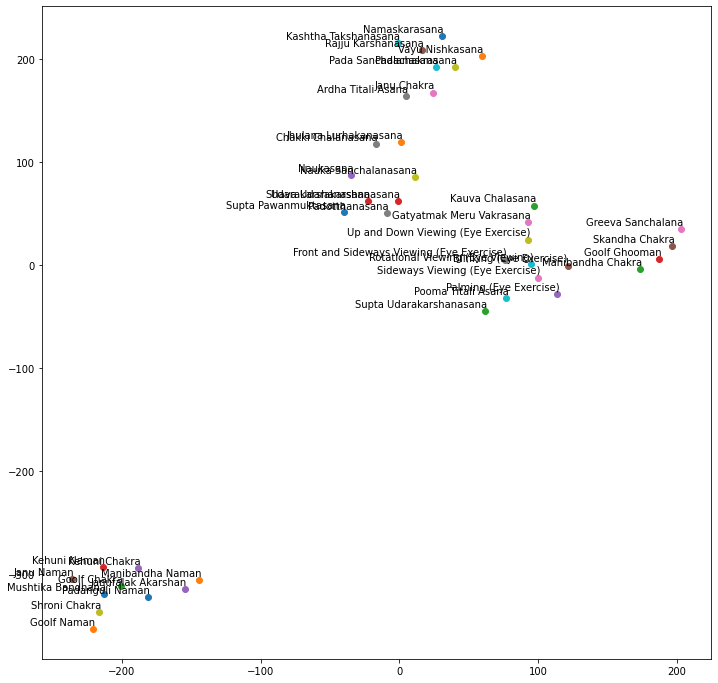

In [28]:
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in words:
        wordvecs.append(model[word])
    for word in words:
        labels.append(word)    
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(12,12)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(model)

In [29]:
pip freeze > requirements.txt

In [30]:
df.head()

,AName,Benefits
0,Padanguli Naman,"[group, asana, concerned, loosening, joint, bo..."
1,Goolf Naman,"[group, asana, concerned, loosening, joint, bo..."
2,Goolf Chakra,"[group, asana, concerned, loosening, joint, bo..."
3,Goolf Ghooman,"[foot, calf, asana, help, returning, stagnant,..."
4,Janufalak Akarshan,"[group, asana, concerned, loosening, joint, bo..."


In [31]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [32]:
# kmeans_model = KMeans(n_clusters=4, init='k-means++', max_iter=100) 
# X = kmeans_model.fit(model.docvecs.doctag_syn0)
# labels=kmeans_model.labels_.tolist()
# l = kmeans_model.fit_predict(model.docvecs.doctag_syn0)
# pca = PCA(n_components=2).fit(model.docvecs.doctag_syn0)
# datapoint = pca.transform(model.docvecs.doctag_syn0)

# plt.figure
# label1 = ["#FFFF00", "#008000", "#0000FF", "#800080"]
# color = [label1[i] for i in labels]
# plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
# centroids = kmeans_model.cluster_centers_
# centroidpoint = pca.transform(centroids)
# plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
# plt.show()

In [33]:
# from scipy.cluster.vq import kmeans,vq

# NUMBER_OF_CLUSTERS = 15

# centroids, _= kmeans(model.docvecs, NUMBER_OF_CLUSTERS)

# # computes cluster Id for document vectors
# doc_ids,_ = vq(model.docvecs,centroids)

# # zips cluster Ids back to document labels 
# doc_labels = zip(model.docvecs.doctags.keys(), doc_ids)

In [34]:
# from sklearn import metrics
 
# import gensim.models as g
# import codecs
 
 
# # model="doc2vec/doc2vec.bin"
# test_docs="data/test_docs.txt"
 
# #inference hyper-parameters
# start_alpha=0.01
# infer_epoch=1000
 
# #load model
# # m = g.Doc2Vec.load(model)
# test_docs = [ x.strip().split() for x in codecs.open(test_docs, "r", "utf-8").readlines() ]
# m = model
# # print (test_docs)
# # """
# # [['the', 'cardigan', 'welsh', 'corgi'........
# # """
 
# X=[]
# for d in test_docs:
     
#     X.append( m.infer_vector(d, alpha=start_alpha, steps=infer_epoch) )
    
 
# k=3
 
# from sklearn.cluster import Birch
 
# brc = Birch(branching_factor=50, n_clusters=k, threshold=0.1, compute_labels=True)
# brc.fit(X)
 
# clusters = brc.predict(X)
 
# labels = brc.labels_
 
 
# print ("Clusters: ")
# print (clusters)
 
 
# silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
# print ("Silhouette_score: ")
# print (silhouette_score)
# print (silhouette_score)

In [35]:
words = []
wordvecs = []
for i in range(len(train_corpus)):
    words += train_corpus.values[i].tags
for word in words:
        wordvecs.append(model[word])
# wordvecs
ar = np.array(wordvecs) 
ar.shape           

(215, 20)

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=10, random_state=0)

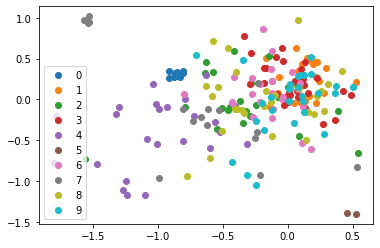

In [38]:
label2 = kmeans.fit_predict(ar)
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label2)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(ar[label == i , 0] , ar[label == i , 1] , label = i)
plt.legend()
plt.show()

In [40]:
mylist2 = {}
for i in range(len(label2)):
  if label2[i] in mylist2.keys():
    mylist2[int(label2[i])].append(train_corpus.values[i].tags)
  else:
    mylist2[int(label2[i])] = []
    mylist2[int(label2[i])].append(train_corpus.values[i].tags)

In [42]:
mylist2

{0: [['Padanguli Naman'],
  ['Goolf Naman'],
  ['Goolf Chakra'],
  ['Janufalak Akarshan'],
  ['Janu Naman'],
  ['Shroni Chakra'],
  ['Mushtika Bandhana'],
  ['Manibandha Naman'],
  ['Kehuni Naman'],
  ['Kehuni Chakra']],
 1: [['Goolf Ghooman'],
  ['Ardha Titali Asana'],
  ['Pooma Titali Asana'],
  ['Manibandha Chakra'],
  ['Skandha Chakra'],
  ['Jhulana Lurhakanasana'],
  ['Chakki Chalanasana'],
  ['Palming (Eye Exercise)'],
  ['Blinking (Eye Exercise) '],
  ['Sideways Viewing (Eye Exercise)'],
  ['Advasana (reversed corpse pose)'],
  ['Makarasana (crocodile pose)'],
  ['Matsya Kridasana (flapping fish pose)'],
  ['Sukhasana (easy pose'],
  ['Ardha Padmasana (half lotus pose)'],
  ['Swastikasana (auspicious pose)'],
  ["Dhyana Veerasana (hero's meditation pose)"],
  ['BHADRASANA'],
  ['SIMHASANA'],
  ['SIMHAGARJANASANA'],
  ['Naman Pranamasana (prostration pose)'],
  ['ARDHA USHTRASANA'],
  ['SUPTA VAJRASANA'],
  ['AKARNA DHANURASANA'],
  ['DRUTA UTKATASANA'],
  ['SAMAKONASANA'],
  ['Y

In [55]:
import random
result2 = []
for i in mylist2.keys():
    k = random.randint(0, len(mylist2[i]) - 1)
    result2.append(mylist2[i][k])

In [56]:
result2

[['Manibandha Naman'],
 ['Skandha Chakra'],
 ['Pada Sanchalanasana'],
 ['KAPALBHATI PRANAYAMA '],
 ['Santolanasana (balancing pose)'],
 ["Kaki Mudra (the crow's beak) "],
 ['Siddhasana (accomplished pose for men)'],
 ['Pooma Matsyendrasana (full spinal twist pose)'],
 ['Kapali Asana (forehead supported pose)'],
 ['Jnana Mudra (psychic gesture of knowledge)']]

In [47]:
data = pd.read_csv('https://raw.githubusercontent.com/MananMaheshwari1/Yoga-Recommendation-System/main/final%20data%20aasans.csv')
data.head()

,AID,AName,Description,Benefits,Contraindications,Breathing,awareness,You tube Vdo link,Photo,References,Variations,Level
0,1,Padanguli Naman,Sit in the base position with the legs outstre...,This group of asanas is concerned with looseni...,NaN,Inhale as the toes move backward.\nExhale as t...,On the stretching produced by the movement and...,NaN,NaN,NaN,NaN,Beginners
1,2,Goolf Naman,Remain in the base position.\nSlowly move both...,This group of asanas is concerned with looseni...,NaN,Inhale as the feet move backward.\nExhale as t...,"On the stretch in the foot, ankle, calf and le...",NaN,NaN,NaN,NaN,Beginners
2,3,Goolf Chakra,Remain in the base position.\nKeep the legs sh...,This group of asanas is concerned with looseni...,NaN,Inhale on the upward movement.\nExhale on the ...,On the rotation of the ankle and the breath.,NaN,NaN,NaN,NaN,Beginners
3,4,Goolf Ghooman,Remain in the base position.\nBend the right k...,All the foot and calf asanas help in returning...,NaN,Inhale on the upward movement.\nExhale on the ...,On the rotation and the breath.,NaN,NaN,NaN,NaN,Beginners
4,5,Janufalak Akarshan,Stay in the base position.\nGently contract th...,This group of asanas is concerned with looseni...,NaN,Inhale while contracting.\nExhale while relaxi...,On the contraction and the breath.,NaN,NaN,NaN,NaN,Beginners


In [48]:
import json 
     
with open("sample.json", "w") as outfile: 
    json.dump(List, outfile)

NameError: ignored

In [ ]:
List  = {}
for i in mylist2.keys():
  temp = []
  for j in range(len(mylist2[i])):
    temp.append(data.loc[data['AName'] == mylist2[i][j][0]].values[0][0])
  List[int(i)] = temp